<a href="https://colab.research.google.com/github/Amitesh-191885/SRIP/blob/main/SRIP_IITGN_2022_Machine_Learning_Prof_Nipun_Batra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1** 

Animate bivariate normal distribution


Reproduce the above figure showing samples from bivariate normal with marginal PDFs from scratch using JAX and matplotlib.
* Add interactivity to the figure by adding sliders with ipywidgets. 
* You should be able to vary the parameters of bivariate normal distribution (mean and covariance matrix) using ipywidgets.






**Task 2**

Implement from scratch a sampling method to draw samples from a **multivariate Normal (MVN) distribution in JAX.**

* Your code should work for any number of dimensions but please set the number of dimensions (random variables of MVN) to 10 for this task.

* You are only allowed to use jax.random.uniform. You are especially not allowed to use jax.random.normal.
* You should randomly create the mean and covariance matrix to fully specify an MVN distribution.
* Implement a sampling method from scratch using which you can draw samples from the specified MVN distribution.
* Use your sampling method to draw multiple samples from the MVN distribution and reconstruct the parameters of your MVN distribution (mean and covariance matrix) to confirm that your sampling method is working correctly


                                                                      Solution 

---

 **import some library** 

---
such as matplotlib.pyplot for ploting, jax.numpy instead of numpy


In [15]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

Some random value

In [16]:
from jaxlib.xla_extension import json_to_pprof_profile
#define dimension 
d = 10
#mean using jax 
mean = jax.numpy.array([1,2]).reshape(2,1)
#mean = [0,0,0]

#Covariance using jax 
K_0 = jnp.array([[2,1],
                [1,2]])
print(K_0)

[[2 1]
 [1 2]]


In [17]:

#Eigenvalues covariance function
jnp.linalg.eigvals(K_0)
#jax.numpy.linalg.eigvals(K_0)

# Define epsilon.
epsilon = 0.0001

# Add small pertturbation. 
K = K_0 + epsilon*jnp.identity(d)

#  Cholesky decomposition.
L = jnp.linalg.cholesky(K)
L

ValueError: ignored

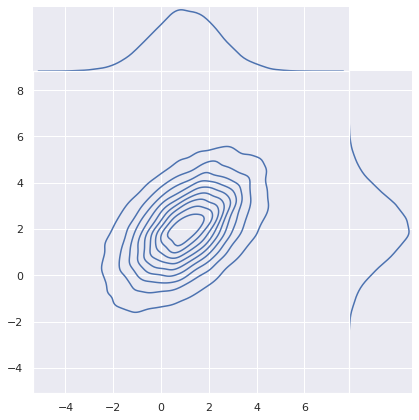

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Define dimension. 
d = 2

# Set mean vector. 
m = np.array([1, 2]).reshape(2, 1)

# Set covariance function. 
K_0 = np.array([[2, 1],
                [1, 2]])

# Eigenvalues covariance function.
np.linalg.eigvals(K_0)

#array([3., 1.])

# Define epsilon.
epsilon = 0.0001

# Add small pertturbation. 
K = K_0 + epsilon*np.identity(d)

#  Cholesky decomposition.
L = np.linalg.cholesky(K)
L

#array([[1.41424892, 0.        ],[0.7070891 , 1.2247959 ]])

np.dot(L, np.transpose(L))

#array([[2.0001, 1.    ],[1.    , 2.0001]])

#Number of samples. 
n = 20000

u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)

x = m + np.dot(L, u)

sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);


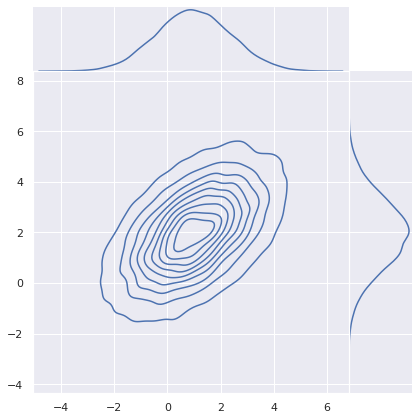

In [19]:

z = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n)

y = np.transpose(z)

# Plot density function.
sns.jointplot(x=y[0], y=y[1], kind="kde", space=0);


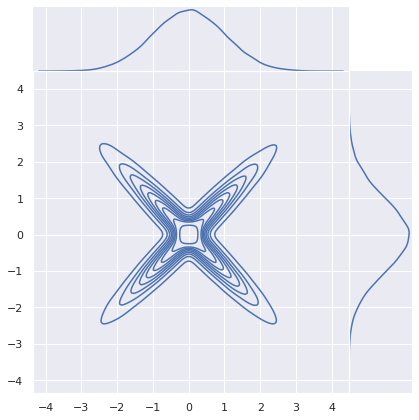

In [20]:
z_1 = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale=1, size=n)

z_2 = np.sign(z)*z_1

sns.jointplot(x=z_1, y=z_2, kind="kde", space=0);

In [21]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import random

key = random.PRNGKey(0)
cov = np.array([[1.2, 0.4], [0.4, 1.0]])
mean = np.array([3,-1])
x1,x2 = jax.random.multivariate_normal(key, mean, cov, (5000,)).T


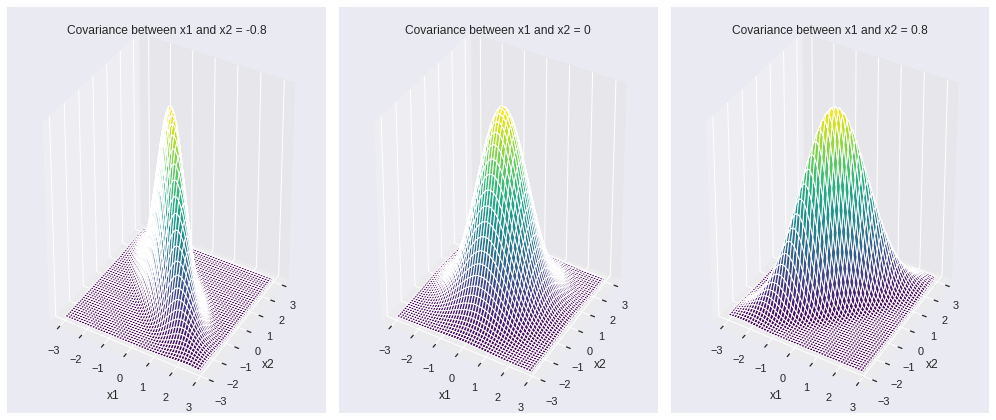

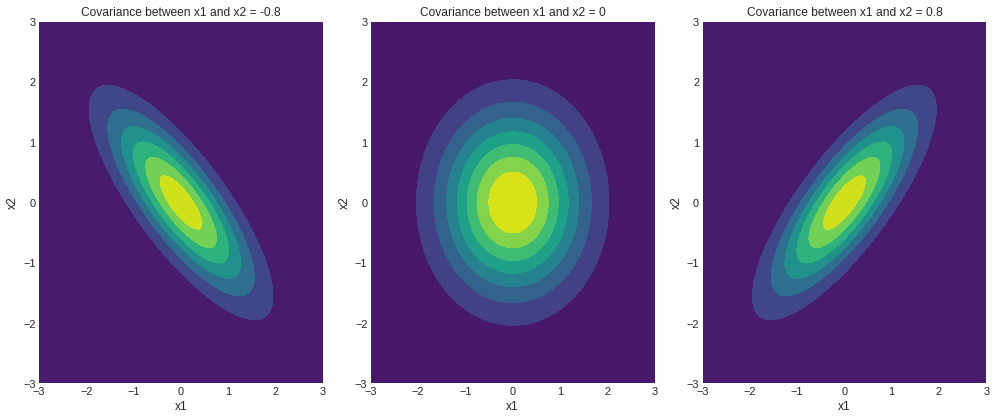

In [22]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
	
	# Initializing the covariance matrix
	cov = np.array([[1, val], [val, 1]])
	
	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)
	
	# Generating a meshgrid complacent with
	# the 3-sigma boundary
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]
	
	x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
	y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
	X, Y = np.meshgrid(x,y)
	
	# Generating the density function
	# for each point in the meshgrid
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
	
	# Plotting the density function values
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {val}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

